## 1.  Yifan's method
Find word's similarity through modeling training

In [1]:
from Data_Processor import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hwk97\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hwk97\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hwk97\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
from gensim.test.utils import common_texts, get_tmpfile
from gensim.models import Word2Vec
from gensim.test.utils import datapath
from gensim import utils

In [3]:
model = gensim.models.Word2Vec.load('D')

In [4]:
for item, prob in model.wv.most_similar(['user','customer','service'],topn=50):
    print(item, prob)

apps 0.5752025246620178
cust 0.5691397190093994
automated 0.5496034622192383
client 0.5471370220184326
convenience 0.5385664701461792
seamless 0.5369963049888611
merchant 0.5285861492156982
functionality 0.5226467847824097
continuously 0.5213117599487305
provider 0.5177848935127258
online 0.5137568712234497
capability 0.5116159319877625
personalized 0.5113574862480164
method 0.5082338452339172
interface 0.4984561502933502
vendor 0.49747660756111145
device 0.496929794549942
transaction 0.4869909882545471
interaction 0.4842202365398407
zelle 0.48402607440948486
personalised 0.4822697043418884
process 0.47558674216270447
ui 0.47495782375335693
app 0.4743165671825409
frictionless 0.47399845719337463
bofahelp 0.4709188938140869
messaging 0.47006237506866455
portal 0.46815064549446106
subscription 0.4664432406425476
costumer 0.46493059396743774
mobile 0.4643592834472656
workflow 0.4621668756008148
product 0.4549829959869385
platform 0.45130419731140137
authentication 0.4493299126625061
proce

## 2.  Ruofan's method
Find similar words through visulization and manually check

In [5]:
dirlist=["../SentistrengthData/Morgan_Stanley_Weekly/Morgan_Stanley"]
DP=Data_Processor(start_month='2017-06',end_month='2020-05',
                  template=dirlist)
DP.readdata()
print(DP.datanums())
DP.specifylang()
noise=DP.removenoise() 
DP.clean()
print(DP.datanums())


([4577, 4968, 4675, 4893, 4178, 5011, 5379, 5127, 3961, 3999, 3606, 5131, 4841, 4097, 3976, 5675, 4350, 3863, 3630, 3471, 3542, 4300, 3988, 5320, 3799, 3265, 3160, 3566, 3455, 3431, 3081, 3417, 3829, 4732, 4458, 4505], 151256)
([4570, 4964, 4673, 4888, 4176, 5006, 5374, 5126, 3959, 3994, 3603, 5129, 4839, 4095, 3973, 5671, 4345, 3860, 3627, 3466, 3541, 4300, 3987, 5315, 3795, 3263, 3160, 3562, 3453, 3429, 3078, 3414, 3825, 4729, 4456, 4504], 151149)


In [6]:
len(DP.data[0])

4570

In [7]:
#only save the data with positive/negative sentiment
ndata=[]
for month_data in DP.data:
    current_month=[]
    for item in month_data[:-1]:
        if  item['positive']>2 or item['negative']<-2:
            current_month.append(item)
    ndata.append(current_month)
    
DP.data=ndata            

In [8]:
months = DP.dlist

def subanalyze(all_data,keywords): # data hierarchy: months*(text,score)*piece
    pospolarity=[]
    negpolarity=[]
    freq=[]
    for month_data in all_data:
        pos=0
        neg=0
        count=0
        for item in month_data:
            for k in keywords:
                if k in item['text'].lower():
                    pos+=item['positive']
                    neg+=item['negative']
                    count+=1
                    break
        pospolarity.append(pos/max(1,count))
        negpolarity.append(neg/max(1,count))
        freq.append(count)
    return pospolarity,negpolarity,freq

def double(data,keyword_list):
    app=subanalyze(data,keyword_list)
    matplotlib.rcParams['figure.dpi'] = 100
    fig, ax1 = plt.subplots()
    ax1.plot(np.array(months),app[0],color='C1')
    ax1.set_xticks(np.arange(36))
    ax1.set_xticklabels([i if x%3==0 else '' for x,i in enumerate(months)],rotation=45)
    ax1.set_ylabel('Positive')
    for t in ax1.xaxis.get_ticklines():
        t.set_visible(False)
    for t in ax1.xaxis.get_ticklines()[::2][::3]:
        t.set_visible(True)
    ax2 = ax1.twinx()
    for t in ax2.xaxis.get_ticklines():
        t.set_visible(False)
    for t in ax2.xaxis.get_ticklines()[::2][::3]:
        t.set_visible(True)
    ax2.set_xticks(np.arange(36))
    ax2.set_xticklabels([i if x%3==0 else '' for x,i in enumerate(months)],rotation=45)
    ax2.plot(months,app[1],color='C2')
    ax2.set_ylabel('Negative')
    ax1.set_title('Keywords: '+', '.join(keyword_list[:3]))
    plt.show()
    
def trend(data,hint,keyword_list): # hint=0 for pos, 1 for neg
    app=subanalyze(data,keyword_list)
    matplotlib.rcParams['figure.dpi'] = 100
    fig, ax1 = plt.subplots()
    ax1.plot(np.array(months),app[hint],color='C'+str(hint+1))
    ax1.set_xticks(np.arange(36))
    ax1.set_xticklabels([i if x%3==0 else '' for x,i in enumerate(months)],rotation=45)
    ax1.set_ylabel('Sentiment Polarity')
    for t in ax1.xaxis.get_ticklines():
        t.set_visible(False)
    for t in ax1.xaxis.get_ticklines()[::2][::3]:
        t.set_visible(True)
    ax2 = ax1.twinx()
    for t in ax2.xaxis.get_ticklines():
        t.set_visible(False)
    for t in ax2.xaxis.get_ticklines()[::2][::3]:
        t.set_visible(True)
    ax2.set_xticks(np.arange(36))
    ax2.set_xticklabels([i if x%3==0 else '' for x,i in enumerate(months)],rotation=45)
    ax2.bar(months,app[2],alpha=0.3)
    ax2.set_ylabel('Sentiment Frequency')
    ax1.set_title('Keywords: '+', '.join(keyword_list))
    plt.show()
    
def all_trend(data,hint,keyword_list):
    app=[subanalyze(i,keyword_list) for i in data]
    matplotlib.rcParams['figure.dpi'] = 200
    fig, ax = plt.subplots(2,2,sharex=True,sharey=True,figsize=(12,8))
    for i in range(2):
        for j in range(2):
            temp=2*i+j
            
            ax[i][j].plot(np.array(months),app[temp][hint],color='C'+str(hint+1))
            ax[i][j].set_xticks(np.arange(36))
            ax[i][j].set_xticklabels([i if x%3==0 else '' for x,i in enumerate(months)],rotation=45)
            if not j:
                ax[i][j].set_ylabel('Sentiment Polarity')
            for t in ax[i][j].xaxis.get_ticklines():
                t.set_visible(False)
            for t in ax[i][j].xaxis.get_ticklines()[::2][::3]:
                t.set_visible(True)
            ax2 = ax[i][j].twinx()
            for t in ax2.xaxis.get_ticklines():
                t.set_visible(False)
            for t in ax2.xaxis.get_ticklines()[::2][::3]:
                t.set_visible(True)
            ax2.set_xticks(np.arange(36))
            ax2.set_xticklabels([i if x%3==0 else '' for x,i in enumerate(months)],rotation=45)
            ax2.bar(months,app[temp][2],alpha=0.3)
            if j:
                ax2.set_ylabel('Sentiment Frequency')
            ax[i][j].set_title(category[temp])
    plt.suptitle('Keywords: '+', '.join(keyword_list[:3]))
    plt.show()

def show(data,months,keywords,count=1):
    result=[]
    for m in range(len(months)):
        for item in data[m]:
            if sum([int(k in item['text'].lower()) for k in keywords])>=count:
                result.append(item)
    return sorted(result, key=lambda x: x['text'])

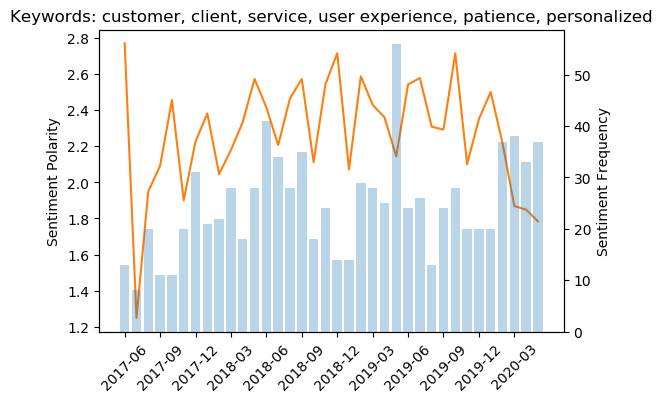

In [9]:
trend(DP.data, 0, ['customer','client','service','user experience', 'patience', 'personalized'])

### 2.1 Extract topic twitter texts
Explore specifc topics and the texts that include them (with at least # count of words)

In [10]:
result = []
for item in show(DP.data,months,keywords=['client', 'service'], count=2):
    if item['positive']>2 or item['negative']<-2:
        result.append([item['text'], item['positive'], item['negative']])
    #remove duplicates in list of tuples 
unique_result = [t for t in (set(tuple(item) for item in result))] 
for item in unique_result:
    print(item[0], item[1], item[2],'\n')

Morgan Stanley is an Investor Services Representative in NY Great opportunity for client service professionals Full description link to apply  3 -1 

We are thrilled to announce Madhu Ghosh Head of Client Data Analytics Ops at Morgan Stanley as a speaker at Chief Data Analytics Officers Influencers Financial Services this February in NYC REGISTER today  4 -1 

I am pleased to announce that I have accepted a position with Morgan Stanley in Chicago IL In the coming weeks I will take on the role serving as a Client Service Associate Im beyond excited to begin the career path that I have aspired to take since the age of Thank 3 -1 

It is great to win new clients but perhaps an even bigger endorsement of Praemiums service and proprietary technology when an existing client deepens the relationship We are delighted to power Morgan Stanleys streamlined client portfolio experience  3 -1 

Celebrating our stars Morgan Stanley recognizes our service professionals for putting our clients needs fi

In [11]:
for item in show(DP.data,months,keywords=['app ','user','client','digital'], count=2):
    if item['positive']>2 or item['negative']<-2:
        result.append([item['text'], item['positive'], item['negative']])
    #remove duplicates in list of tuples 
unique_result = [t for t in (set(tuple(item) for item in result))] 
for item in unique_result:
    print(item[0], item[1], item[2],'\n')

Excellent digital vision Deliver at the speed of our Clients  4 -1 

Back from last weeks terrific Team Transformation Summit ready to share with clients Cant believe all the new digital features and safety measures that the firm is rolling out Proud to work for an industry leader  4 -1 

Morgan Stanley is an Investor Services Representative in NY Great opportunity for client service professionals Full description link to apply  3 -1 

Much like newspapers and magazines Traditional TV is under assault Hundreds if not thousands of cable satellite and digital channels Mass media is giving way to ultratargeted media Facebook Google digital networks all have tons of data on users So do you MS 2 -3 

We are thrilled to announce Madhu Ghosh Head of Client Data Analytics Ops at Morgan Stanley as a speaker at Chief Data Analytics Officers Influencers Financial Services this February in NYC REGISTER today  4 -1 

I am pleased to announce that I have accepted a position with Morgan Stanley in Ch

In [12]:
result = []
for item in show(DP.data,months,keywords=['app ','user'], count=2):
    if item['positive']>2 or item['negative']<-2:
        result.append([item['text'], item['positive'], item['negative']])
    #remove duplicates in list of tuples 
unique_result = [t for t in (set(tuple(item) for item in result))] 
for item in unique_result:
    print(item[0], item[1], item[2],'\n')

rd prize for Inclusive STEM Hackathon goes to the team which developed an app which notifies the visually impaired users if someone is pointing towards them Microsoft MorganStanley intel  3 -2 

MorganStanley Pathetic Stockplan connect mobile app It doesnt even have verification process reenter password before you place an order App users are at loss Disgusting 1 -3 

 Not great signs for HS if true Morgan Stanley estimates m users were lost from to while paid users dropped k Big app developers NexonMobile zynga and Rovio all saw similar declines in paid users in  2 -3 



In [13]:
result = []
for item in show(DP.data,months,keywords=['app ', 'design', 'look', 'account'], count=2):
    if item['positive']>2 or item['negative']<-2:
        result.append([item['text'], item['positive'], item['negative']])
    #remove duplicates in list of tuples 
unique_result = [t for t in (set(tuple(item) for item in result))] 
for item in unique_result:
    print(item[0], item[1], item[2],'\n')

Pretty cool to trade Stocks and ETFs with no fees using the RobinhoodApp platform been doing that for a few weeks now Learnt today that now we can trade Options too Im wondering why I still have my MorganStanley brokerage account  3 -2 

TankandBarrel RT KylePorterCBS Justin Rose looks like he got a free hat for putting in his Morgan Stanley online account and is mega focused on breaking for the first time on the Black on his only Friday off this month  3 -2 

Ive just been looking at what Twitter thinks Im into settings account my dataAngelina Jolie Golf badminton bella hajid apple Morgan Stanley Michael Gove sky news Where do they get this rubbish from  1 -3 

RobinhoodApp Hurting a lot of people lately with your crashes Time to get serious and utilize an enterprise brokerage account MorganStanley whats up 2 -3 

jimcramer Curious Jim your take on the news Morgan Stanley Ubers underwriter pushed a short product to locked up lyft investors How is a retail investor supposed to account 

### 2.2 Extract sentiment frequency
Explore each months various (pos,neg) sentiment combinations frequency

In [14]:
from collections import Counter
idx = months.index('2018-05')
print("positive", "negative", "count")
Counter([(item['positive'],item['negative']) for item in DP.data[idx]])

positive negative count


Counter({(2, -3): 111,
         (3, -1): 700,
         (1, -4): 64,
         (3, -3): 40,
         (3, -2): 106,
         (1, -3): 232,
         (4, -3): 4,
         (3, -4): 12,
         (2, -4): 27,
         (4, -2): 10,
         (4, -1): 68,
         (2, -5): 1,
         (4, -5): 1,
         (4, -4): 3,
         (5, -2): 2,
         (5, -1): 1})

### 2.3 Explore topic modeling
Topic modeling under certain topic -> extract smaller topics/aspects of a certain topic

In [15]:
import gensim
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from gensim.models import Word2Vec, CoherenceModel

import pprint

from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

#set topic number here
num_topics = 5
num_words = 15

stop_lists = set(stopwords.words('english'))
stop_lists.update(('http','llc','inc', 'twitter', 'tweet','morgan', 'stanley', 'morganstanley'))

In [16]:
def LDA(texts, topics=10, num_words=15, dictionary = None):
    if not dictionary:
        dictionary = corpora.Dictionary(texts) # texts: list of list of words
    corpus = [dictionary.doc2bow(text) for text in texts]
    num_topics = topics #The number of topics that should be generated
    passes = 30
    lda = LdaModel(corpus,
              id2word=dictionary,
              alpha = 'auto',
              num_topics=num_topics,
              passes=passes)
    
    return lda

In [17]:
#Explore app design topic in all months
result = []
for item in show(DP.data,months,keywords=['app ', 'design', 'look', 'account'], count=2):
    if item['positive']>2 or item['negative']<-2:
        result.append(item['text'])
#remove duplicates in list of tuples 
unique_result_token = [[token for token in sent.split(" ") if len(token)>=3 and (token.lower() not in stop_lists)]
                           for sent in list(set(result))]
unique_result_string = [" ".join(tokens) for tokens in unique_result_token]

#### 2.3.1 LDA method - using frequency

In [18]:
lda_model = LDA(unique_result_token, topics=num_topics, num_words=num_words)

pp = pprint.PrettyPrinter(indent=4)
pp.pprint(lda_model.print_topics(num_words=num_words))

[   (   0,
        '0.018*"looks" + 0.018*"like" + 0.018*"account" + 0.013*"excited" + '
        '0.013*"etrade" + 0.013*"online" + 0.013*"month" + 0.013*"mega" + '
        '0.013*"got" + 0.013*"focused" + 0.013*"hat" + 0.013*"putting" + '
        '0.013*"Justin" + 0.013*"Black" + 0.013*"time"'),
    (   1,
        '0.017*"accounts" + 0.009*"account" + 0.009*"look" + 0.009*"last" + '
        '0.009*"investment" + 0.009*"looking" + 0.009*"put" + 0.009*"fees" + '
        '0.009*"one" + 0.009*"significant" + 0.009*"done" + 0.009*"collect" + '
        '0.009*"money" + 0.009*"mattress" + 0.009*"better"'),
    (   2,
        '0.019*"new" + 0.013*"look" + 0.013*"Look" + 0.013*"get" + 0.013*"one" '
        '+ 0.007*"Thank" + 0.007*"Program" + 0.007*"Looks" + 0.007*"Lesbian" + '
        '0.007*"Individual" + 0.007*"Tom" + 0.007*"Connection" + '
        '0.007*"Design" + 0.007*"Choices" + 0.007*"Hair"'),
    (   3,
        '0.017*"account" + 0.017*"app" + 0.017*"like" + 0.010*"look" + '
        

#### 2.3.2 NMF method - using matrix factorization

In [19]:
tfidf_vect = TfidfVectorizer(max_df=0.8, min_df=2, stop_words=stop_lists)
doc_term_matrix = tfidf_vect.fit_transform(unique_result_string) #use string dato to transform
nmf = NMF(n_components=num_topics, random_state=42)
nmf.fit(doc_term_matrix)

for i,topic in enumerate(nmf.components_):
    print(f'Top {num_words} words for topic #{i}:')
    print([tfidf_vect.get_feature_names()[i] for i in topic.argsort()[-num_words:]])
    print('\n')

Top 15 words for topic #0:
['moving', 'see', 'looks', 'take', 'news', 'pretty', 'app', 'significant', 'fidelity', 'dont', 'another', 'last', 'accounts', 'like', 'look']


Top 15 words for topic #1:
['app', 'fees', 'time', 'take', 'looking', 'weeks', 'get', 'pretty', 'today', 'wondering', 'still', 'news', 'robinhoodapp', 'brokerage', 'account']


Top 15 words for topic #2:
['time', 'breaking', 'black', 'rose', 'got', 'first', 'month', 'mega', 'focused', 'free', 'justin', 'friday', 'hat', 'putting', 'online']


Top 15 words for topic #3:
['fees', 'robinhoodapp', 'brokerage', 'significant', 'fidelity', 'investment', 'time', 'news', 'looking', 'like', 'looks', 'one', 'get', 'dont', 'new']


Top 15 words for topic #4:
['last', 'take', 'looks', 'app', 'cash', 'put', 'fees', 'accounts', 'another', 'outlook', 'see', 'excited', 'moving', 'investment', 'well']


